Sprint 1:
Problem Statement:
Energy consumption is an essential and growing concern in today’s society, affecting environmental stability, economic health, and public well-being. As global energy demands increase, it has become clear that efficient energy use is no longer just an option but a necessity. Energy consumption fluctuates throughout the year due to a variety of factors, such as weather patterns, time of day, and economic activity. Seasonal changes, peak hours, and unanticipated events all contribute to significant variations in demand, making it challenging to accurately predict and balance supply.
Without accurate analysis and forecasting, utility providers face critical difficulties in matching supply with demand. This imbalance often results in a range of inefficiencies, including power outages, inflated operational costs, and unnecessary overproduction of energy. Such inefficiencies not only increase the risk of grid instability but also put undue strain on energy infrastructure, which can lead to significant financial losses and environmental harm. Additionally, relying on fossil fuels for overproduction exacerbates environmental degradation, contributing to the depletion of resources that are increasingly difficult to regenerate.

I come from an environmental background, and it has always been an area of great interest to me. I want to use my skills and knowledge not only to help myself as a resident of Maryland but also to benefit others in the state and the environment. This project aims to address these challenges by developing a predictive model for forecasting energy consumption in real-time. The goal is to create a framework that will assist in better grid management, enhance energy efficiency, and enable more sustainable practices in energy distribution. By leveraging advanced data analytics and machine learning techniques, the project seeks to provide more accurate insights into energy consumption patterns and facilitate proactive management by utility providers. This can help them predict demand spikes, minimize waste, and optimize energy distribution, contributing to the reduction of carbon emissions and the conservation of non-renewable resources.

The importance and urgency of addressing this issue are evident when considering the wider implications of inaccurate energy consumption forecasting. The inability to predict energy demand can lead to power shortages and gridlock, resulting in disruptions to both essential services and day-to-day life. For example, power outages can severely affect hospitals, emergency services, transportation networks, and industrial operations, undermining public safety and economic productivity. In residential areas, citizens may experience prolonged outages, which negatively impacts their quality of life and access to vital services. Accurate demand forecasting, therefore, is critical to prevent such disruptions.
Additionally, the ability to predict energy consumption with greater precision allows utility providers to make timely adjustments to energy production and distribution. By identifying areas with high or low energy demand in advance, providers can reduce the likelihood of outages, lower costs associated with overproduction, and enhance overall grid efficiency. This level of foresight helps energy companies better plan for infrastructure upgrades, reduce energy waste, and ensure the longevity and reliability of the energy grid.

Ultimately, the ability to predict energy consumption more accurately is vital not only for preventing operational disruptions but also for creating a more sustainable, resilient energy infrastructure. This project aims to equip utility providers with the tools they need to manage energy consumption more effectively, reducing costs, improving service reliability, and contributing to environmental sustainability. By encouraging innovation in predictive analytics, we can ensure that energy is used wisely and that future generations can enjoy a stable and sustainable energy system.


Similar Works:
In 2015, an article titled "Big Data Analytics in Power Distribution Systems." was published. The article discusses the use of advanced sensors in power systems to significantly increase the amount of data available, which can then be used to improve energy efficiency and management. The authors explain that the data analyzed includes electricity usage data from smart meters, grid data, and other forms of data collection.

One of the key recommendations made in the article is how to collect better data. The authors emphasize the importance of using advanced sensors in power systems to gather more data than ever before. This would involve utilizing advanced metering infrastructure and high-frequency sensors. The increased volume of data allows for more thorough analysis and can help us propose more effective solutions for addressing energy consumption issues in the future.



Scope:
In this project, the Random Forest model will be used as the primary machine learning algorithm for predicting energy consumption. Cross-validation will be employed to assess how well the model performs across different subsets of the data, ensuring that the model generalizes well. Additionally, the Mean Absolute Error (MAE) will be calculated to measure the average error between predicted and actual values, which helps assess the accuracy of the model's predictions. The data will be normalized before performing the machine learning model to enhance its accuracy.

Two primary predictions will be made: first, to forecast the energy prices for the following year, and second, to estimate how much energy residents in Maryland will potentially consume, based on historical data. Visualizations will be created to compare the predicted values with the actual data available on the EIA website, allowing for an intuitive assessment of prediction accuracy. Visualization will be a bar graph to make comparisons easier to see. The data used for this analysis will be exclusively from the state of Maryland, sourced from the EIA website. The focus will be on residential energy consumption data to identify trends and patterns in usage. By using historical energy consumption data, the project will aim to uncover underlying patterns that may not be immediately apparent and predict future energy usage and costs.





Data dictionary for predicting the total retail sales based on previous data:

Year(int): year of the data point.(2018, 2019, 2020, 2021, 2022, 2023)
Avg Price (cents/kWh)(float): the average price of electricity in cents per kilowatt-hour (kWh).
Total retail sales (MWh)(int): total retail sales of electricity in megawatt-hours (MWh)
Predicted retail sales (float): predicted total retail sales of electricity in megawatt-hours (MWh).	
Actual retail sales (MWh)(int): actual total retail sales of electricity in megawatt-hours (MWh).	
Prediction Error (MWh)(int): difference between the predicted and actual retail sales in MWh.


Using the previous data from 2018 to the year before. I used the random forest model to predict the sates (MWh) for the following years. I will be doing the test to predict for 2021,2022, and 2023. The model will use all the previous years data I provided. After training the datapoints it will make a predictions. The graph will present what the model predicts will be the years retail sales and compare it to the actual amount reported from the data source. In addition to this, I will perform a cross verification  ation to show how well the model performed in different parts of the dataas well as a MAE (Mean Absolute Error) to understand the average error of the results which gives me an idea if the data points were accurate. 


Predicted Retail Sales for 2021: 59,923,295 MWh
Actual Retail Sales for 2021: 59,303,974 MWh
Prediction Error: 619,321 MWh

Predicted Retail Sales for 2022: 61,421,041 MWh
Actual Retail Sales for 2022: 59,682,719 MWh
Prediction Error: 1,738,322 MWh

Predicted Retail Sales for 2023: 60,375,777 MWh
Actual Retail Sales for 2023: 57,033,085 MWh
Prediction Error: 3,342,692 MWh



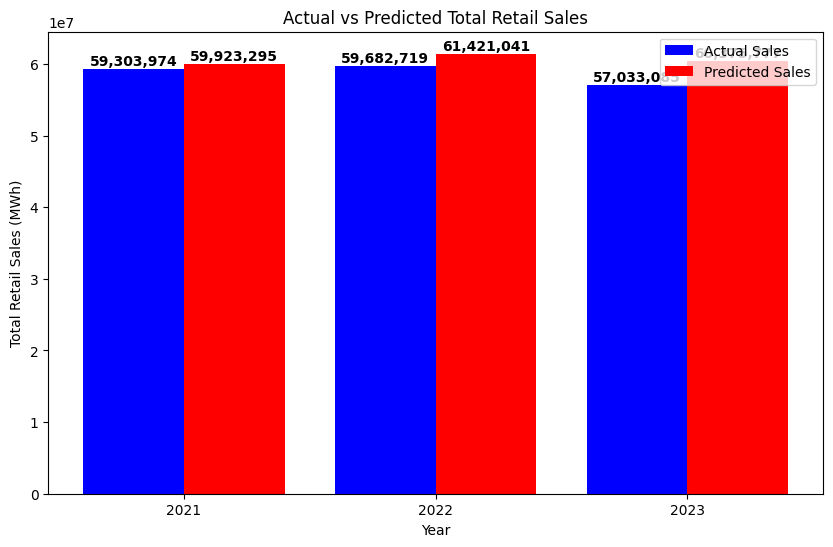

Mean Absolute Error (MAE): 1,900,112 MWh

Cross-Validation Results (MAE for each fold): [2581510.1        2507970.08        684431.75       1786903.03399999
 3342692.014     ]
Average MAE across all folds: 2,180,701 MWh


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Revenue (thousand dollars)": [3741620, 3611327, 3551281, 3669204, 4057913, 4333163],
    "Avg Price (cents/kWh)": [13.3, 13.12, 13.01, 13.12, 14.46, 16.6],
    "Total retail sales (MWh)": [62086455, 60720658, 57629040, 59303974, 59682719, 57033085]
}

df = pd.DataFrame(data)

years = [2021, 2022, 2023]
predicted_sales = []
actual_sales = []

for year in years:
    train_data = df[df["Year"] < year]
    X_train = train_data[["Avg Price (cents/kWh)"]]
    y_train = train_data["Total retail sales (MWh)"]
    
    test_data = df[df["Year"] == year][["Avg Price (cents/kWh)"]]
    actual_sales.append(df[df["Year"] == year]["Total retail sales (MWh)"].values[0])
    
    # Normalize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(test_data)
    
    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    predicted_value = model.predict(X_test_scaled)[0]
    predicted_sales.append(predicted_value)
    
    print(f"Predicted Retail Sales for {year}: {predicted_value:,.0f} MWh")
    print(f"Actual Retail Sales for {year}: {actual_sales[-1]:,.0f} MWh")
    print(f"Prediction Error: {abs(actual_sales[-1] - predicted_value):,.0f} MWh\n")

# visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(years))  
width = 0.4  

plt.bar(x - width/2, actual_sales, width, label="Actual Sales", color='blue')
plt.bar(x + width/2, predicted_sales, width, label="Predicted Sales", color='red')

plt.xlabel("Year")
plt.ylabel("Total Retail Sales (MWh)")
plt.title("Actual vs Predicted Total Retail Sales")
plt.xticks(ticks=x, labels=years)
plt.legend()

for i in range(len(years)):
    plt.text(i - width/2, actual_sales[i] + 500000, f"{actual_sales[i]:,.0f}", ha='center', fontsize=10, fontweight='bold')
    plt.text(i + width/2, predicted_sales[i] + 500000, f"{predicted_sales[i]:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


# calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_sales, predicted_sales)
print(f"Mean Absolute Error (MAE): {mae:,.0f} MWh")

# cross-validation
X = df[["Avg Price (cents/kWh)"]]
y = df["Total retail sales (MWh)"]

# normalizing for cross-validation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# time series cross-validation (using KFold)
kf = KFold(n_splits=5, shuffle=False)  # No shuffling for time-series data
cv_results = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')

cv_results = -cv_results

# cross-validation results
print(f"\nCross-Validation Results (MAE for each fold): {cv_results}")
print(f"Average MAE across all folds: {cv_results.mean():,.0f} MWh")

the Mean Absolute Error (MAE) of 1,654,783 MWh shows that, on average, the model's predicted retail sales are off by approximately 1.65 million MWh from the actual values. This gives us the general accuracy of the model's predictions, a lower MAE suggesting better predictive performance. This error margin might be fine depending on the analysis, but a higher MAE could suggest the need to improve the model or adjust its settings for better accuracy.

This suggests that the model and process I am using is not completely the best to use when making predictions. Some data points are off. This may suggest that there are other factors that contrubute to the prediction of future years. 

Strenths:
The code is simple and clear, using a Random Forest model with standard data preprocessing like scaling. It also includes a helpful visualization to compare actual vs. predicted sales and uses MAE to evaluate model performance, which is easy to understand. Based on the graph we could infer that the predictions are relatively close and may be used and helpful for the following year.

Weakness:
The model might not be fully accurate based on the small dataset and reliance on default settings, which could lead to overfitting or underfitting. MAE doesn't show whether the model is consistently over or under-predicting, and it doesn't penalize large errors as strongly as other metrics like RMSE. Adding more features or using different evaluation metrics could improve the model's performance. On average, the model's predictions were off by about 2.18 million MWh, based on the cross validation. This means the model’s performance is not consistent across all years, and there may be room for improvement. Meaning the model’s performance is not consistent across all years, and there may be room for improvement.




The following model will use data from previous years, put them into the learning model, random forest, and make a prediction for the next year. The next years that I will be attempting to predict will be 2021,2022,2023.


Data Dictionary:
*variables may also have variring numbers after the following written label to relay the year of testing/predicting.
-Year(int):  year energy consumption and revenue data are recorded.
-Revenue (thousand dollars)(int): total revenue generated from electricity sales in thousand dollars.
-Avg Price (cents/kWh)(float): average price of electricity per kilowatt-hour in cents.
-Total retail sales (MWh)(int): total electricity sales in megawatt-hours.
train_data(dataframe):	Subset of df containing records where Year ≤ 2020,2021,2022 used for training.
X_train(df): the independent variable--> (Avg Price (cents/kWh), Total retail sales (MWh)) from train_data.
y_train(series): Dependent variable(Revenue (thousand dollars)) from train_data.
Test_data(df): Data from 2021,2020,2022 used for testing
actual_revenue_202X(int): actual revenue from given data set from according year.
X_train_scaled(array): Normalized feature values for training data.
X_test_scaled(array): Normalized feature values for test data.
predicted_revenue_202x(float)Revenue predicted by the model for predicting year.

cross-validation dictionary
cv_scores(array)cross-validation negative mean squared error (MSE) scores.
cv_mse_scores(Array)converted positive MSE scores.
average_cv_mse(float)average mean squared error from cross-validation.

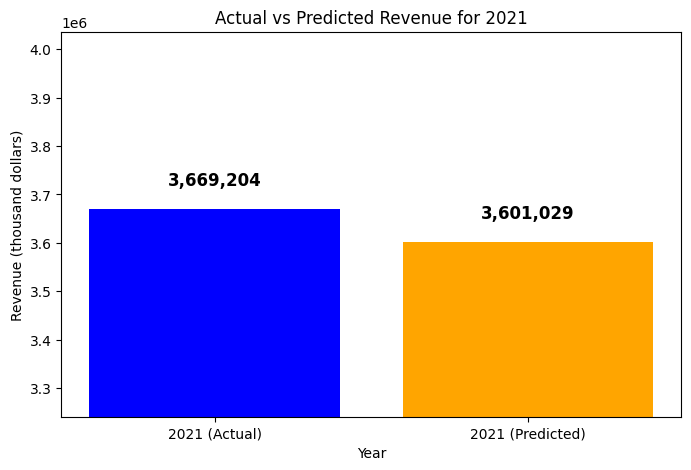


Predicted Revenue for 2021: 3,601,029
Actual Revenue for 2021: 3,669,204
Prediction Error for 2021: 68,175
Cross-validation MSE scores for 2021: [2.05931454e+10 1.51556670e+09 8.82137590e+09]
Average cross-validation MSE for 2021: 10310029348.86


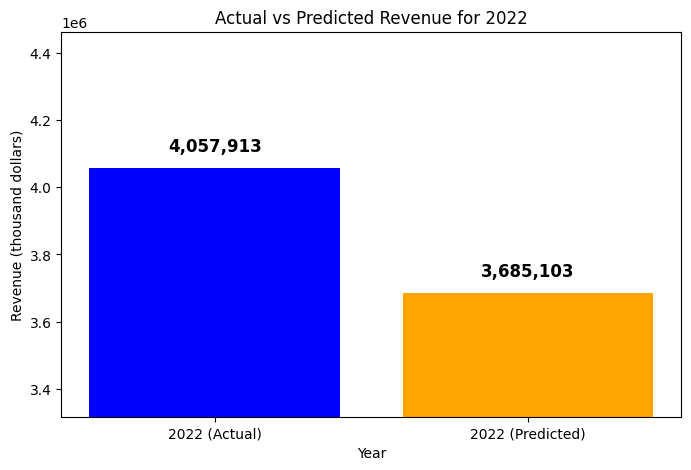


Predicted Revenue for 2022: 3,685,103
Actual Revenue for 2022: 4,057,913
Prediction Error for 2022: 372,810
Cross-validation MSE scores for 2022: [5.68271192e+09 1.09745466e+10 4.64786199e+09]
Average cross-validation MSE for 2022: 7101706818.52


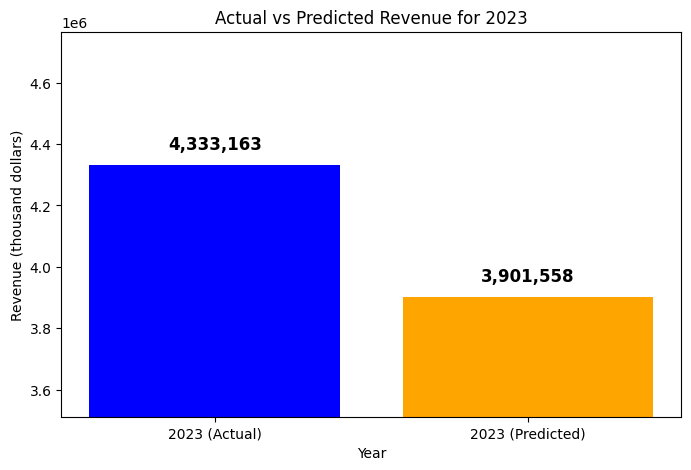


Predicted Revenue for 2023: 3,901,558
Actual Revenue for 2023: 4,333,163
Prediction Error for 2023: 431,605
Cross-validation MSE scores for 2023: [1.78176959e+10 3.89978253e+10 1.38987072e+11]
Average cross-validation MSE for 2023: 65267531199.04

Summary of Results:
Year 2021 - Predicted Revenue: 3601029, Actual Revenue: 3669204, Prediction Error: 68175
Year 2022 - Predicted Revenue: 3685103, Actual Revenue: 4057913, Prediction Error: 372810
Year 2023 - Predicted Revenue: 3901558, Actual Revenue: 4333163, Prediction Error: 431605


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# dataset
data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Revenue (thousand dollars)": [3741620, 3611327, 3551281, 3669204, 4057913, 4333163],
    "Avg Price (cents/kWh)": [13.3, 13.12, 13.01, 13.12, 14.46, 16.6],
    "Total retail sales (MWh)": [62086455, 60720658, 57629040, 59303974, 59682719, 57033085]
}

df = pd.DataFrame(data)

years_to_predict = [2021, 2022, 2023]

predictions = []

# Loop through each year
for year in years_to_predict:
    # get data from 2018 to the current year-1 to train
    train_data = df[df["Year"] <= year - 1]
    X_train = train_data[["Avg Price (cents/kWh)", "Total retail sales (MWh)"]]
    y_train = train_data["Revenue (thousand dollars)"]

    #  pick current year for testing (prediction target)
    test_data = df[df["Year"] == year][["Avg Price (cents/kWh)", "Total retail sales (MWh)"]]
    actual_revenue = df[df["Year"] == year]["Revenue (thousand dollars)"].values[0]

    # Normalize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(test_data)

    # train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # predict revenue 
    predicted_revenue = model.predict(X_test_scaled)[0]

    predictions.append({
        "Year": year,
        "Predicted Revenue": predicted_revenue,
        "Actual Revenue": actual_revenue,
        "Prediction Error": abs(actual_revenue - predicted_revenue)
    })

    # visualization
    plt.figure(figsize=(8, 5))
    years_label = [f"{year} (Actual)", f"{year} (Predicted)"]
    revenues = [actual_revenue, predicted_revenue]
    plt.bar(years_label, revenues, color=['blue', 'orange'])
    plt.xlabel("Year")
    plt.ylabel("Revenue (thousand dollars)")
    plt.title(f"Actual vs Predicted Revenue for {year}")
    plt.ylim(min(revenues) * 0.9, max(revenues) * 1.1)  # Adjust y-axis for clarity

    for i, v in enumerate(revenues):
        plt.text(i, v + 50000, f"{v:,.0f}", ha='center', fontsize=12, fontweight='bold')

    plt.show()

    print(f"\nPredicted Revenue for {year}: {predicted_revenue:,.0f}")
    print(f"Actual Revenue for {year}: {actual_revenue:,.0f}")
    print(f"Prediction Error for {year}: {abs(actual_revenue - predicted_revenue):,.0f}")

    #  3-fold Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')
    cv_mse_scores = -cv_scores  # Convert negative MSE to positive
    average_cv_mse = np.mean(cv_mse_scores)
    
    print(f"Cross-validation MSE scores for {year}: {cv_mse_scores}")
    print(f"Average cross-validation MSE for {year}: {average_cv_mse:.2f}")

print("\nSummary of Results:")
for result in predictions:
    print(f"Year {result['Year']} - Predicted Revenue: {result['Predicted Revenue']:.0f}, Actual Revenue: {result['Actual Revenue']:.0f}, Prediction Error: {result['Prediction Error']:.0f}")


Strengths: The cross-validation show that the model is capable of providing error estimates for each year. The average Mean Squared Error (MSE) for 2021 (10.31 billion) and 2022 (7.1 billion) suggests that the model performs reasonably well, with smaller errors compared to 2023. This tells me that the model is able to predict revenue trends fairly accurately for the earlier years. For 2021 and 2022, the MSE values are not excessively high, and this could be promising when used for making predictions for future years.

Weaknesses: However, the model shows significant variability in its error for 2023, with the MSE values ranging from 17.8 billion to over 138.9 billion, leading to an average MSE of 65.27 billion. This large error indicates that the model struggles to predict revenue accurately for 2023, potentially due to the increased complexity in the data or a lack of key features. The model's performance declines as the prediction year moves further away from the training data, signaling potential overfitting to past years or insufficient training data. The wide range of MSE values also suggests that the model might not generalize well for future years beyond the training period. This drastic shift may be due to the rate of changing increase. 


Overall, the MSE and cross-validation results suggest that there are additional features that need to be considered for accurate predictions using the learning model. Without these, the data could become skewed, leading to unreliable predictions. For future research, I may explore tuning the hyperparameters of the Random Forest model to achieve more consistent results across the folds. Additionally, I could add more features or transform existing ones to enhance the model's ability to make accurate predictions.